In [ ]:
# basic module
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
import shutil
from glob import glob
import time
import pickle

plt.style.use('seaborn-dark')
%config InlineBackend.figure_format = 'retina'
pd.options.display.max_rows = 20
pd.options.display.max_columns = 20

plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = False

In [ ]:
save_dir = '/content/drive/MyDrive/3차플젝drive/KAGGLE_UNET/UNET_MASK'
save_f = glob(save_dir + '/' + "*.jpg")
len(save_f)

In [ ]:
# def retext(x):
#     x = x.replace('_predict','').split('UNET_MASK/')[1].split('.jpg')[0]
#     return x

In [ ]:
normal_path ='/content/drive/MyDrive/3차플젝drive/공모전_이전_캐글/PD/penumonia/KG_JPG/normal/'
normal_files = glob(os.path.join(normal_path, "*.jpg"))

qnormal_path = '/content/drive/MyDrive/3차플젝drive/공모전_이전_캐글/PD/penumonia/KG_JPG/normal?/'
qnormal_files = glob(os.path.join(qnormal_path, "*.jpg"))

pneu_path = '/content/drive/MyDrive/3차플젝drive/공모전_이전_캐글/PD/penumonia/KG_JPG/pneumonia/'
pneu_files = glob(os.path.join(pneu_path, "*.jpg"))

In [ ]:
print('normal', len(normal_files), '     ', normal_files[0])
print('qnormal', len(qnormal_files), '    ', qnormal_files[0])
print('pneu', len(pneu_files), '   ', pneu_files[0])
print(len(normal_files) + len(qnormal_files) + len(pneu_files))

normal 14477       /content/drive/MyDrive/3차플젝drive/공모전_이전_캐글/PD/penumonia/KG_JPG/normal/0a72a6fe-0dde-49f0-bb65-d3d73366b83f.jpg
qnormal 6195      /content/drive/MyDrive/3차플젝drive/공모전_이전_캐글/PD/penumonia/KG_JPG/normal?/c3ed68a1-efb5-429d-86f4-fcc234bd1fba.jpg
pneu 6011     /content/drive/MyDrive/3차플젝drive/공모전_이전_캐글/PD/penumonia/KG_JPG/pneumonia/35e2f247-6930-4b7d-bc43-baaa622cce2c.jpg
26683


In [ ]:
normal_path = '/content/drive/MyDrive/3차플젝drive/공모전_이전_캐글/PD/penumonia/KG_JPG/normal/'
id = retext(save_f[0])
format = '.jpg'

normal_path + id + format


'/content/drive/MyDrive/3차플젝drive/공모전_이전_캐글/PD/penumonia/KG_JPG/normal/920cb58d-e9c4-4055-a361-6eddea60207b.jpg'

In [ ]:
normal = []
qnormal = []
pneu = []
no = []
error = []


for mask in save_f:
    id = retext(mask)
    format = '.jpg'
    normal_path = '/content/drive/MyDrive/3차플젝drive/공모전_이전_캐글/PD/penumonia/KG_JPG/normal/'
    qnormal_path = '/content/drive/MyDrive/3차플젝drive/공모전_이전_캐글/PD/penumonia/KG_JPG/normal?/'
    pneu_path = '/content/drive/MyDrive/3차플젝drive/공모전_이전_캐글/PD/penumonia/KG_JPG/pneumonia/'
    
    normal_id = normal_path + id + format
    qnormal_id = qnormal_path + id + format
    pneu_id = pneu_path + id + format

    try:
        if normal_id  in  normal_files:
            normal.append(normal_id)

        elif qnormal_id in qnormal_files:
            qnormal.append(qnormal_id)

        elif pneu_id in pneu_files:
            pneu.append(pneu_id)

        else:
            no.append(id)
            
    except Exception as e:
        print(e)
        error.append(id)
            

In [ ]:
normal_files[0]

'/content/drive/MyDrive/3차플젝drive/공모전_이전_캐글/PD/penumonia/KG_JPG/normal/0a72a6fe-0dde-49f0-bb65-d3d73366b83f.jpg'

In [ ]:
def normal_retext(x) :
    x = x.split('normal/')[1].split('.jpg')[0]
    return x

In [ ]:
# normal
normal_id = []
for normal_file in normal_files:
    n_id = normal_retext(normal_file)
    normal_id.append(n_id)

In [ ]:
qnormal_files[0]

'/content/drive/MyDrive/3차플젝drive/공모전_이전_캐글/PD/penumonia/KG_JPG/normal?/c3ed68a1-efb5-429d-86f4-fcc234bd1fba.jpg'

In [ ]:
def qnormal_retext(x) :
    x = x.split('normal?/')[1].split('.jpg')[0]
    return x

In [ ]:
qnormal_id = []
for qnormal_file in qnormal_files:
    qn_id = qnormal_retext(qnormal_file)
    qnormal_id.append(qn_id)

In [ ]:
pneu_files[0]

'/content/drive/MyDrive/3차플젝drive/공모전_이전_캐글/PD/penumonia/KG_JPG/pneumonia/35e2f247-6930-4b7d-bc43-baaa622cce2c.jpg'

In [ ]:
def pneu_retext(x) :
    x = x.split('pneumonia/')[1].split('.jpg')[0]
    return x

In [ ]:
pneu_id = []
for pneu_file in pneu_files:
    pn_id = pneu_retext(pneu_file)
    pneu_id.append(pn_id)

In [ ]:
save_f[0]

'/content/drive/MyDrive/3차플젝drive/KAGGLE_UNET/UNET_MASK/920cb58d-e9c4-4055-a361-6eddea60207b_predict.jpg'

In [ ]:
def save_retext(x):
    x = x.split('UNET_MASK/')[1].replace('_predict','').split('.jpg')[0]
    return x

In [ ]:
save_id = []
for save in save_f:
    s_id = save_retext(save)
    save_id.append(s_id)

In [ ]:
# check pneumonia id are masked?
pneu_yes = []
no = []
for id in pneu_id:
    if id in save_id:
        pneu_yes.append(id)
    elif id not in save_id:
        no.append(id)


In [ ]:
n_yes = []
n_no = []
for n in normal_files:
    x = normal_retext(n)
    if x in save_id:
        n_yes.append(x)
    elif x not in save_id:
        n_no.append(n)

In [ ]:
print(len(n_yes))
len(n_no)

14070


407

In [ ]:
q_yes=[]
q_no = []
for q in qnormal_files:
    x = qnormal_retext(q)
    if x in save_id:
        q_yes.append(x)
    elif x not in save_id:
        q_no.append(x)

In [ ]:
p_yes = []
p_no = []
for p in pneu_files:
    x = pneu_retext(p)
    if x in save_id:
        p_yes.append(x)
    elif x not in save_id:
        p_no.append(x)

In [ ]:
len(n_no) + len(q_no) + len(p_no)

407

In [ ]:
import os
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras import backend as keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler

from glob import glob
from tqdm import tqdm

def test_load_image(test_file, target_size=(256,256)):
    img = cv2.imread(test_file, cv2.IMREAD_GRAYSCALE)
    img = img / 255
    img = cv2.resize(img, target_size)
    img = np.reshape(img, img.shape + (1,))
    img = np.reshape(img,(1,) + img.shape)
    return img

def test_generator(test_files, target_size=(256,256)):
    for test_file in test_files:
        yield test_load_image(test_file, target_size)
        
def save_result(save_path, npyfile, test_files):
    for i, item in enumerate(npyfile):
        result_file = test_files[i]
        img = (item[:, :, 0] * 255.).astype(np.uint8)

        filename, fileext = os.path.splitext(os.path.basename(result_file))

        result_file = os.path.join(save_path, "%s_predict%s" % (filename, fileext))

        cv2.imwrite(result_file, img)

import tensorflow
model = tensorflow.keras.models.load_model('/content/drive/MyDrive/3차플젝drive/test/model/unet_2_100.h5',compile=False)

In [ ]:
# normal
#n_no
save_dir = '/content/drive/MyDrive/3차플젝drive/KAGGLE_UNET/UNET_MASK'
t_gen= test_generator(n_no, target_size=(512,512))
B = model.predict_generator(t_gen, len(n_no), verbose=1)
save_result(save_dir, B, n_no)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """


407/407 [==============================] - 149s 343ms/step


In [ ]:
#QN
#q_no
save_dir = '/content/drive/MyDrive/3차플젝drive/KAGGLE_UNET/UNET_MASK'
t_gen= test_generator(q_no, target_size=(512,512))
B = model.predict_generator(t_gen, len(q_no), verbose=1)
save_result(save_dir, B, q_no)

In [ ]:
#PN
#p_no
save_dir = '/content/drive/MyDrive/3차플젝drive/KAGGLE_UNET/UNET_MASK'
t_gen= test_generator(p_no, target_size=(512,512))
B = model.predict_generator(t_gen, len(p_no), verbose=1)
save_result(save_dir, B, p_no)

In [ ]:
save_dir = '/content/drive/MyDrive/3차플젝drive/KAGGLE_UNET/UNET_MASK'
save_f = glob(save_dir + '/' + "*.jpg")
len(save_f)

26683

In [ ]:
cd test

/content/drive/.shortcut-targets-by-id/1BX4a76ZgAV3v_4f92zIjOVpwJ6RMMxJZ/3차플젝drive/test/KAGGLE/Segment/input/segmentation/test


In [ ]:
og_img = '/content/drive/MyDrive/3차플젝drive/test/KAGGLE/Segment/input/segmentation/test/CHNCXR_0014_0.png'
mask_img = '/content/drive/MyDrive/3차플젝drive/test/KAGGLE/Segment/input/segmentation/test/CHNCXR_0014_0_mask.png'
dilate_img = '/content/drive/MyDrive/3차플젝drive/test/KAGGLE/Segment/input/segmentation/test/CHNCXR_0014_0_dilate.png'

In [ ]:
def rv_3ch(og_img_path, mask_path, size):
    
    #module import
    import cv2
    
    # im_read
    og_img = cv2.imread(og_img_path)
    mask = cv2.imread(mask_path)
    
    # clahe
    clahe = cv2.createCLAHE(5.0,(12,12))
    
    ## og_img_convert
    cvt_img = cv2.resize(og_img, size)
    cvt_img = cv2.cvtColor(cvt_img,cv2.COLOR_BGR2GRAY)
    cvt_img = clahe.apply(cvt_img)  # 1 channel
    cvt_img = np.repeat(cvt_img[:,:,np.newaxis],3,-1)

    ## mask
    cvt_mask = cv2.resize(mask, size)
    cvt_mask = cv2.cvtColor(cvt_mask, cv2.COLOR_BGR2GRAY)

    ## remove
    remove = cv2.bitwise_and(cvt_img, cvt_img, mask = cvt_mask)
    
    return remove

In [35]:
mask = cv2.imread(mask_img)
mask.shape

(512, 512, 3)

In [36]:
remove = rv_3ch(og_img, mask_img, (512,512))
remove_1 = rv_3ch(og_img,dilate_img,(512,512))

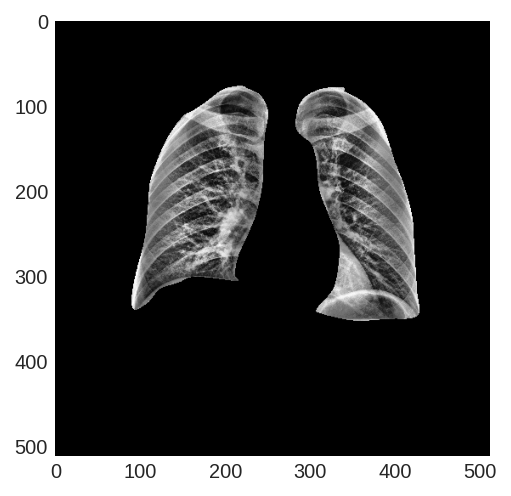

In [37]:
import cv2
plt.imshow(remove)
